In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from scipy.stats import shapiro 
from scipy.stats import lognorm

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import confusion_matrix

from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
import sklearn as sk

In [36]:
data = pd.read_csv('Data/M1_final.csv')
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [37]:
data.info()
# Dew point should be int
#data['Dew Point'] = data['Dew Point'].astype('int')
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  int64  
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [38]:
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,30.420819,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,12.314083,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


Description of data:

MONTH, integer with month
DAY_OF_MONTH, integer with day of flight
DAY_OF_WEEK, integer with day of week
OP_UNIQUE_CARRIER, - carrier code i.e. company
TAIL_NUM, - flight tail number
DEST, - destination
DEP_DELAY, departure delay
CRS_ELAPSED_TIME, - scheduled journey time of the flight
DISTANCE, - distance of the flight
CRS_DEP_M, - scheduled departure time
DEP_TIME_M, actual departure time
CRS_ARR_M, - scheduled arrival time
Temperature, - temperature in degrees C
Dew Point, - dew point
Humidity, - humidity
Wind, wind direction
Wind Speed, - wind speed
Wind Gust, - wind gust
Pressure, air pressure
Condition, weather condition
sch_dep, No of flights scheduled for departure
sch_arr, - no of flights scheduled for arrival
TAXI_OUT - taxi out time

/var/folders/w3/j_v3f_rs4hlbh_rnzsc6j2rm0000gn/T/ipykernel_38813/354807488.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
/var/folders/w3/j_v3f_rs4hlbh_rnzsc6j2rm0000gn/T/ipykernel_38813/354807488.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=False)


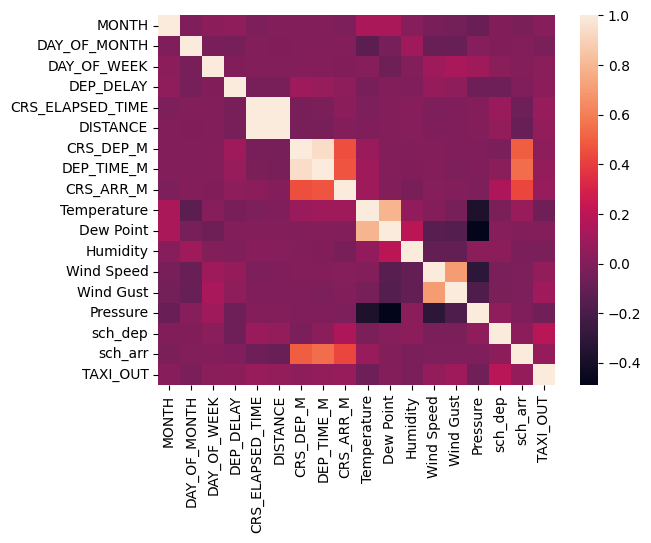

<Figure size 1000x500 with 0 Axes>

In [40]:
data.corr()

# could use seaborn heatmap to display this
sns.heatmap(data.corr(),annot=False)
plt.figure(figsize=(10,5))
plt.show()

# Temp, air pressure and  and wind speed were correlated
# Also distance and CRS elapsed time
# actual and planned departure time were correlated

In [41]:
groupby_dest = data[['TAXI_OUT','DEST']].groupby('DEST').describe()
print(groupby_dest)
groupby_dest.to_csv('Data/groupby_dest.csv')

     TAXI_OUT                                                   
        count       mean       std   min   25%   50%   75%   max
DEST                                                            
ABQ      58.0  22.620690  8.243717  11.0  15.0  21.0  29.0  41.0
ATL     795.0  19.272956  6.881488   7.0  14.0  18.0  23.0  41.0
AUS     485.0  19.226804  6.192346   9.0  15.0  18.0  23.0  41.0
BNA     366.0  19.702186  7.110967   7.0  15.0  19.0  24.0  41.0
BOS    1243.0  20.218825  6.371894   9.0  16.0  19.0  24.0  41.0
...       ...        ...       ...   ...   ...   ...   ...   ...
SMF      82.0  18.878049  5.774337  11.0  15.0  18.0  22.0  38.0
SRQ     105.0  19.895238  6.139287  10.0  15.0  19.0  24.0  38.0
STT      62.0  26.661290  7.539934  14.0  21.0  27.0  33.5  40.0
SYR     389.0  20.935733  6.678052   9.0  16.0  20.0  25.0  41.0
TPA     664.0  19.992470  6.836262   8.0  15.0  19.0  24.0  41.0

[65 rows x 8 columns]


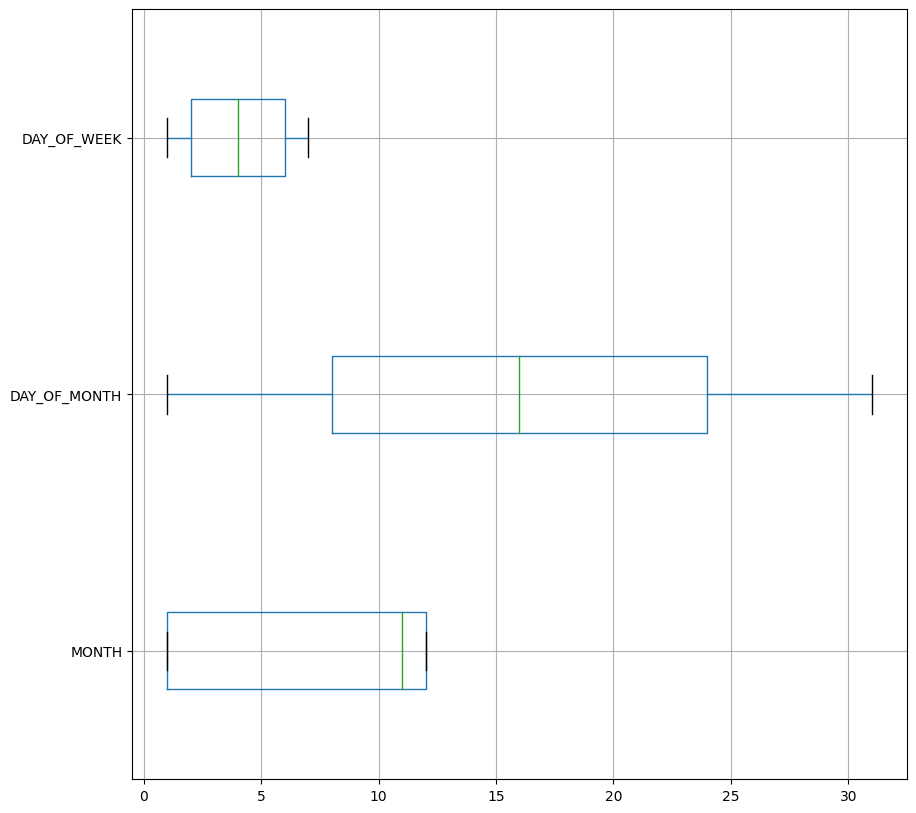

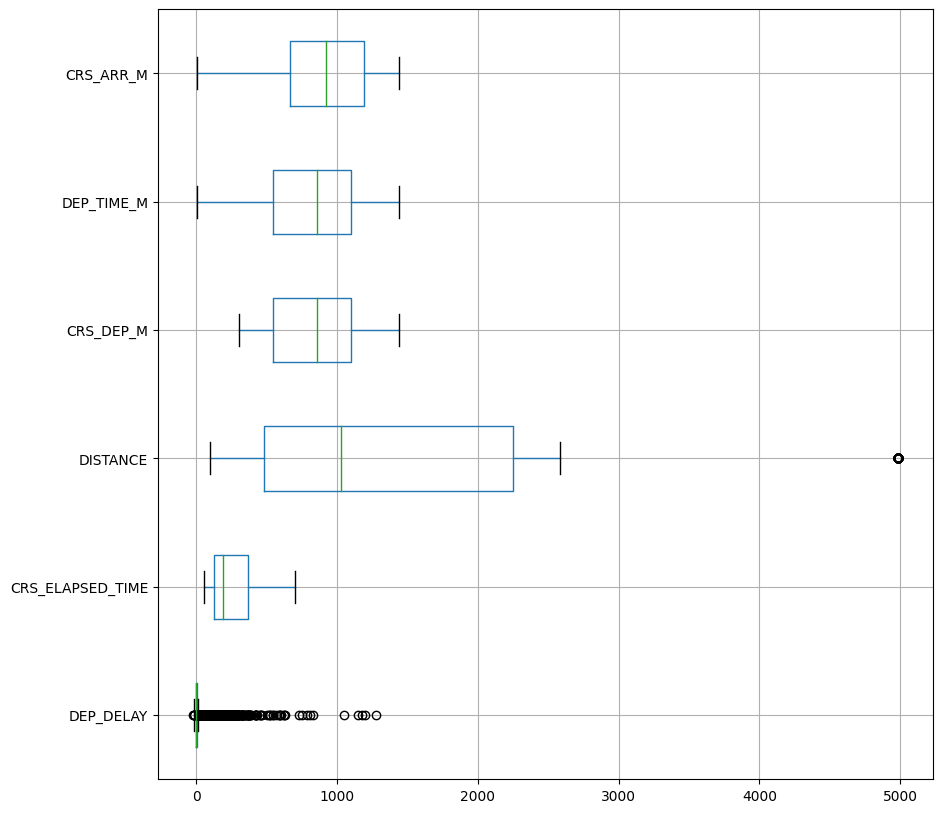

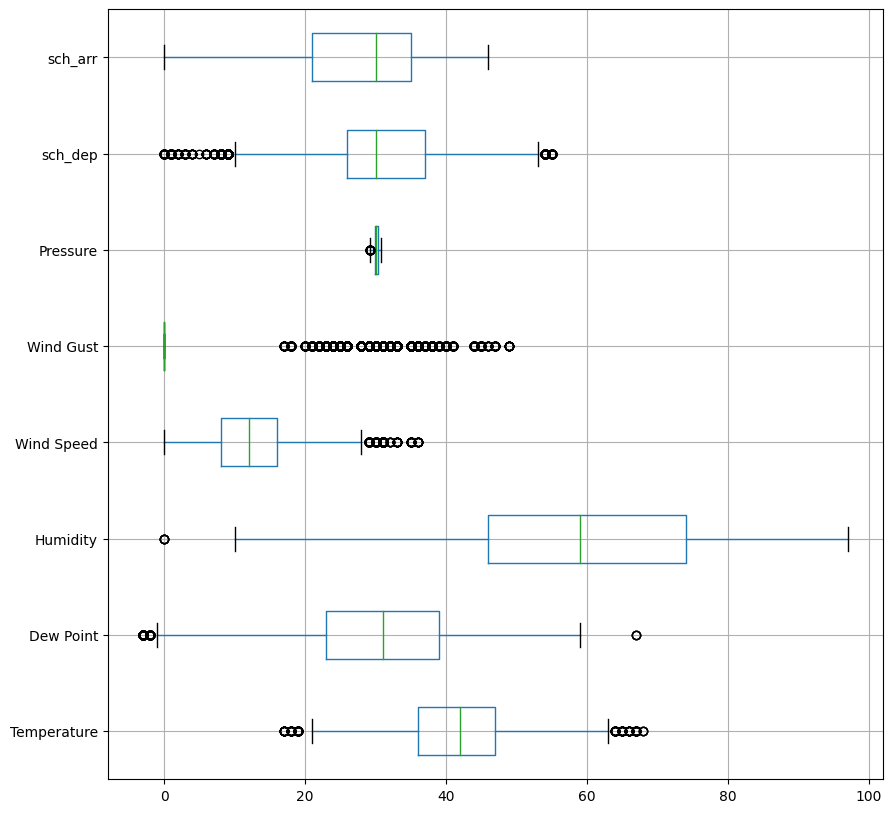

In [42]:
data.iloc[:-1,0:3].boxplot(figsize=(10,10),vert=False)
plt.show()

data.iloc[:-1,3:12].boxplot(figsize=(10,10),vert=False)
plt.show()
data.iloc[:-1,12:22].boxplot(figsize=(10,10),vert=False)
plt.show()

In [43]:
#data['MONTH'].replace(1,13)
data['Wind Gust'].values[data['Wind Gust'] > 0] = 1 # set data to either there are or there aren't wind gusts
data['DEP_DELAY'].values[data['DEP_DELAY'] > 0] = 1 # set data to either there is or there isn't a departure delay

In [44]:
# Variables to drop or modify

data = data.drop('CRS_ELAPSED_TIME', axis=1) # dropped because it is correlated with distance
data = data.drop('MONTH', axis=1) # dropped because there is too little data
data = data.drop('CRS_DEP_M', axis=1) # dropped because it is correlated with scheduled departure
data = data.drop('TAIL_NUM', axis=1) # dropped because its like an id number and is too much

data = pd.get_dummies(data=data, drop_first=True) # turns categorical variables into dummy numberical variables

#data['dep_delay'] =  data['DEP_TIME_M'] - data['CRS_DEP_M'] # creating variable for time between scheduled and actual departure
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,1,5,-1,636,323,448,48,34,58,25,...,0,0,0,0,0,0,0,0,0,0
1,1,5,-7,2475,333,531,48,34,58,25,...,0,0,0,0,0,0,0,0,0,0
2,1,5,1,1069,341,482,48,34,58,25,...,0,0,0,0,0,0,0,0,0,0
3,1,5,-2,944,343,513,48,34,58,25,...,0,0,0,0,0,0,0,0,0,0
4,1,5,-4,760,356,499,46,32,58,24,...,0,0,0,0,0,0,0,0,0,0


In [108]:
#Rechecking correlation with the cleaned up dataset
correlation_outcome=data.corrwith(data['TAXI_OUT'])
correlation_outcome = pd.DataFrame(data=correlation_outcome)
correlation_outcome.columns = ['corr']
correlation_outcome=correlation_outcome.sort_values(by=["corr"],ascending=False)
correlation_outcome.head(20)

#correlation_outcome.to_csv('Data/correlation.csv')
#print(correlation_outcome.columns)

,corr
TAXI_OUT,1.000000
sch_dep,0.190101
OP_UNIQUE_CARRIER_AS,0.136707
Wind Gust,0.090051
DEP_DELAY,0.084187
CRS_ARR_M,0.071377
Condition_Light Snow,0.069590
Wind_ENE,0.068062
OP_UNIQUE_CARRIER_DL,0.066608
Condition_Wintry Mix,0.065937


In [46]:
# Create dictionary for labels
dict_labels = {
'MONTH': 'Month',
'DAY_OF_MONTH': 'day of flight',
'DAY_OF_WEEK': 'Day of week',
'OP_UNIQUE_CARRIER': 'Carrier code i.e. company',
'TAIL_NUM': 'Flight tail number',
'DEST': 'Destination',
'DEP_DELAY': 'Departure delay',
'CRS_ELAPSED_TIME': 'Scheduled journey time of the flight',
'DISTANCE': 'Distance of the flight',
'CRS_DEP_M': 'Scheduled departure time',
'DEP_TIME_M': 'Actual departure time',
'CRS_ARR_M': 'Scheduled arrival time',
'Temperature': 'Temperature in degrees C',
'Dew Point': 'Dew point',
'Humidity': 'Humidity',
'Wind': 'Wind direction',
'Wind Speed': 'Wind speed',
'Wind Gust': 'Wind gust',
'Pressure': 'Air pressure',
'Condition': 'Weather condition',
'sch_dep': 'No of flights scheduled for departure',
'sch_arr': 'No of flights scheduled for arrival',
'TAXI_OUT': 'Taxi out time'}

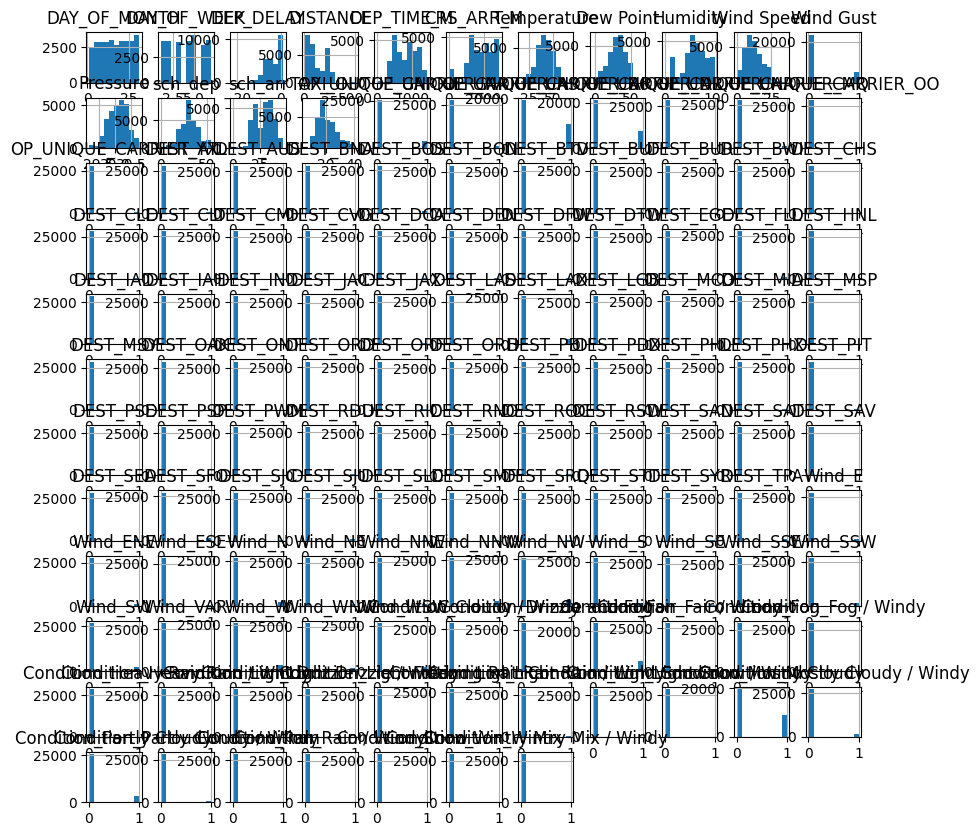

In [47]:
data.hist(bins=10, figsize=(10,10))
plt.show()



In [58]:
# Creating some graphs to show the correlation between each variable and the outcome variable

# select the outcome variable Y
#Y = data.loc[:, 'TAXI_OUT'].values.reshape(-1, 1)

# column headers
#column_headers = list(data.columns.values)


#for variable in column_headers:
#    X = data.loc[:,variable].values.reshape(-1, 1)

#    linear_regressor = LinearRegression()  # create a linear regression object
#    linear_regressor.fit(X, Y)  # perform the linear regression
#    Y_pred = linear_regressor.predict(X)  # make the predictions based on the model
    
#    plotting data and predicted variable
#    anot_1 = "Corr:" + str(data['TAXI_OUT'].corr(data[variable]).round(2))
#    plt.scatter(X, Y)
#    plt.plot(X, Y_pred, color='green')
#    plt.ylabel('Taxi-out time') 
#    plt.title(anot_1)
#    plt.xlabel(dict_labels[variable])
    
#    plt.show()
#    plt.savefig('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/'+str(variable)+'.png')

In [51]:
# Testing for a normal distribution
#for variable in column_headers:
#    anot1= shapiro(data[variable])
#    plt.hist(data[variable], edgecolor='black', bins=20)
#    #title=variable+anot1
#    plt.title(variable+str(anot1))
#    plt.show()
#    fig = sm.qqplot(data[variable], line='45')
#    plt.title(variable+str(anot1))

#    plt.show()

In [52]:
# moving the column around!!
#data = data.reindex(columns=['DAY_OF_MONTH','DAY_OF_WEEK','DEP_DELAY','DISTANCE','DEP_TIME_M','CRS_ARR_M','Temperature','Dew Point','Humidity','Wind Speed','Wind Gust','Pressure','sch_arr','sch_dep','TAXI_OUT'])
temp_cols=data.columns.tolist()
index=data.columns.get_loc("TAXI_OUT")
new_cols=temp_cols[index:index+1] + temp_cols[0:index] + temp_cols[index+1:]
data=data[new_cols]
print(data)

       TAXI_OUT  DAY_OF_MONTH  DAY_OF_WEEK  DEP_DELAY  DISTANCE  DEP_TIME_M  \
0            14             1            5         -1       636         323   
1            15             1            5         -7      2475         333   
2            22             1            5          1      1069         341   
3            12             1            5         -2       944         343   
4            13             1            5         -4       760         356   
...         ...           ...          ...        ...       ...         ...   
28815        19            31            5          1       150        1372   
28816        22            31            5          1       187        1392   
28817        21            31            5          1      2422        1408   
28818        13            31            5          1      1598        1422   
28819        15            31            5         -1      1576        1438   

       CRS_ARR_M  Temperature  Dew Point  Humidity 

In [55]:
X = data.iloc[:-1, 1:128] # set predicting variables
y = data.iloc[:-1, 0] # set variable to predict (score)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train) # Scaling  training set
X_test = scaler_X.transform(X_test) # Scaling test set


Mean Absolute Error: 5.053526577118135
Mean Squared Error: 40.77871699888162
Root mean squared Error: 6.385821560213033
R squared: 0.149507281702004


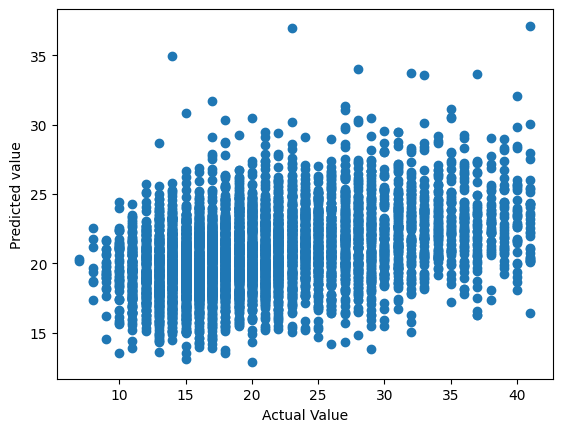

In [59]:

linearRegression_model = LinearRegression() # Logistic Regression model
linearRegression_model.fit(X_train, y_train) # Training the model


prediction = linearRegression_model.predict(X_test) # Predict the response on the test data

# actual value and predicted value
act_pred = pd.DataFrame({'Actual Value': y_test,'Predicted Value': prediction})
act_pred
# the fit doesn't look great here

plt.scatter(act_pred['Actual Value'], act_pred['Predicted Value'])
plt.xlabel('Actual Value')
plt.ylabel('Predicted value')

print('Mean Absolute Error:', mean_absolute_error(y_test,prediction))
print('Mean Squared Error:', mean_squared_error(y_test,prediction))
print('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared:', r2_score(y_test,prediction))
#accuracy_score(y_test,prediction)


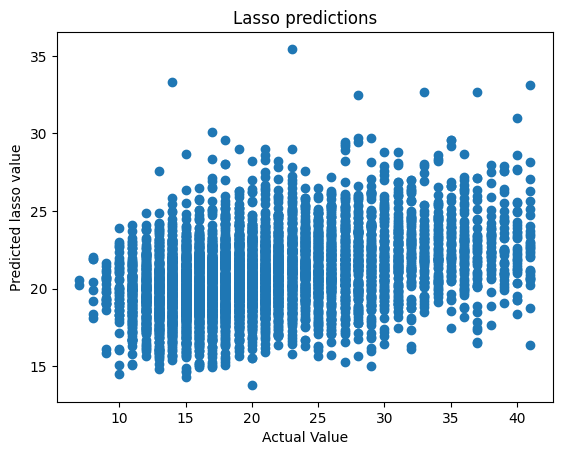

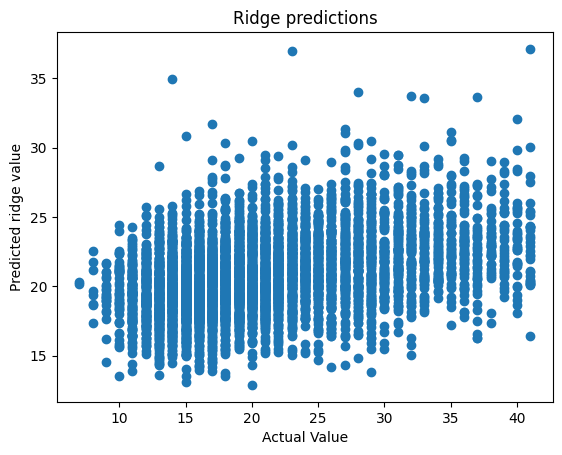

Mean Absolute Error: 5.083292289281435
Mean Squared Error: 41.14174852066207
Root mean squared Error: 6.414183386890499
R squared: 0.1419357912650837
Mean Absolute Error: 5.053525504238065
Mean Squared Error: 40.778705087212714
Root mean squared Error: 6.385820627547623
R squared: 0.14950753013521656


In [60]:
# define models
model_lasso = Lasso(alpha=0.05)
model_ridge = Ridge(alpha=0.05)

# fit models
model_lasso.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)

# define new data to predict - this is just a single row
new = data.iloc[3000, 0:15]
actual = data.iloc[3000, 16]

# make predictions
prediction_lasso = model_lasso.predict(X_test)
prediction_ridge = model_ridge.predict(X_test)

# actual value and predicted value
act_pred = pd.DataFrame({'Actual Value': y_test,'Predicted lasso value': prediction_lasso,'Predicted ridge value': prediction_ridge})
act_pred
# the fit doesn't look great here

plt.scatter(act_pred['Actual Value'], act_pred['Predicted lasso value'])
plt.xlabel('Actual Value')
plt.ylabel('Predicted lasso value')
plt.title('Lasso predictions')
plt.show()
plt.scatter(act_pred['Actual Value'], act_pred['Predicted ridge value'])
plt.xlabel('Actual Value')
plt.ylabel('Predicted ridge value')
plt.title('Ridge predictions')
plt.show()

print('Mean Absolute Error:', mean_absolute_error(y_test,prediction_lasso))
print('Mean Squared Error:', mean_squared_error(y_test,prediction_lasso))
print('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,prediction_lasso)))
print('R squared:', r2_score(y_test,prediction_lasso))

print('Mean Absolute Error:', mean_absolute_error(y_test,prediction_ridge))
print('Mean Squared Error:', mean_squared_error(y_test,prediction_ridge))
print('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,prediction_ridge)))
print('R squared:', r2_score(y_test,prediction_ridge))

# None of this looks much better than the straight linear regression

R-squared: -2.307686446998322e+19
CV mean score:  -3.8617454226982345e+27
MSE:  7.289035739536494e+20
RMSE:  26998214273.42278


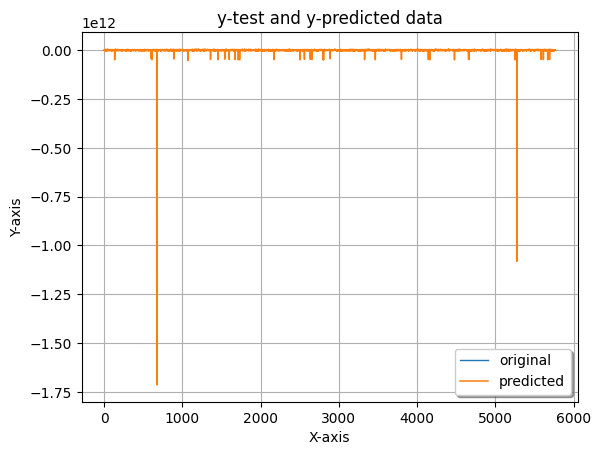

In [72]:
# From here https://www.datatechnotes.com/2020/09/regression-example-with-sgdregressor-in-python.html
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

sgdr = SGDRegressor()
sgdr.fit(X_train,y_train)

score = sgdr.score(X_train, y_train)
print("R-squared:", score)

cv_score = cross_val_score(sgdr, X, y, cv = 10)
print("CV mean score: ", cv_score.mean())

ypred = sgdr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

accuracy on training set: 1.000000
accuracy on test set: 0.075295


(0.0, 1.0)

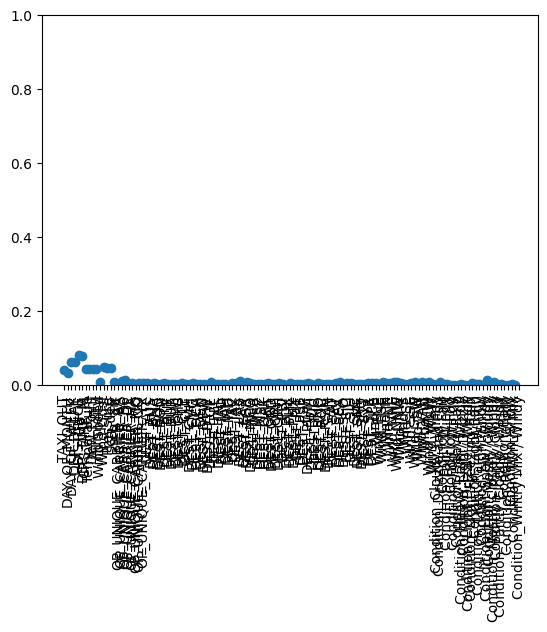

In [63]:
# try a random forest model 

rf = RandomForestClassifier()
rf.fit(X_train, y_train)#Evaluate the model:
print("accuracy on training set: %f" % rf.score(X_train, y_train))
print("accuracy on test set: %f" % rf.score(X_test, y_test))
rf.feature_importances_
plt.plot(rf.feature_importances_, 'o')
plt.xticks(range(data.shape[1]), data.columns, rotation=90)
plt.ylim(0, 1)

In [65]:
#Using only 5 nodes:
rf_5 = RandomForestClassifier(max_depth=5)
rf_5.fit(X_train, y_train)
print("accuracy on training set: %f" % rf_5.score(X_train, y_train))
print("accuracy on test set: %f" % rf_5.score(X_test, y_test))

accuracy on training set: 0.112687
accuracy on test set: 0.071478


Accuracy (gini): 0.06384455239417071
Accuracy (entropy): 0.059854267869535044
Accuracy (depth): 0.07269257460097155
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/w3/j_v3f_rs4hlbh_rnzsc6j2rm0000gn/T/ipykernel_38813/721249547.py", line 27, in <module>
    sk.tree.plot_tree(decisionTree_model_depth, filled=True, fontsize=14, feature_names=data.columns[1:128], class_names=['non-diabetic', 'diabetic'])
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_export.py", line 195, in plot_tree
    return exporter.export(decision_tree, ax=ax)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_export.py", line 656, in export
    my_tree = self._make_tree(0, decision_tree.tree_, decision_tree.criterion)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

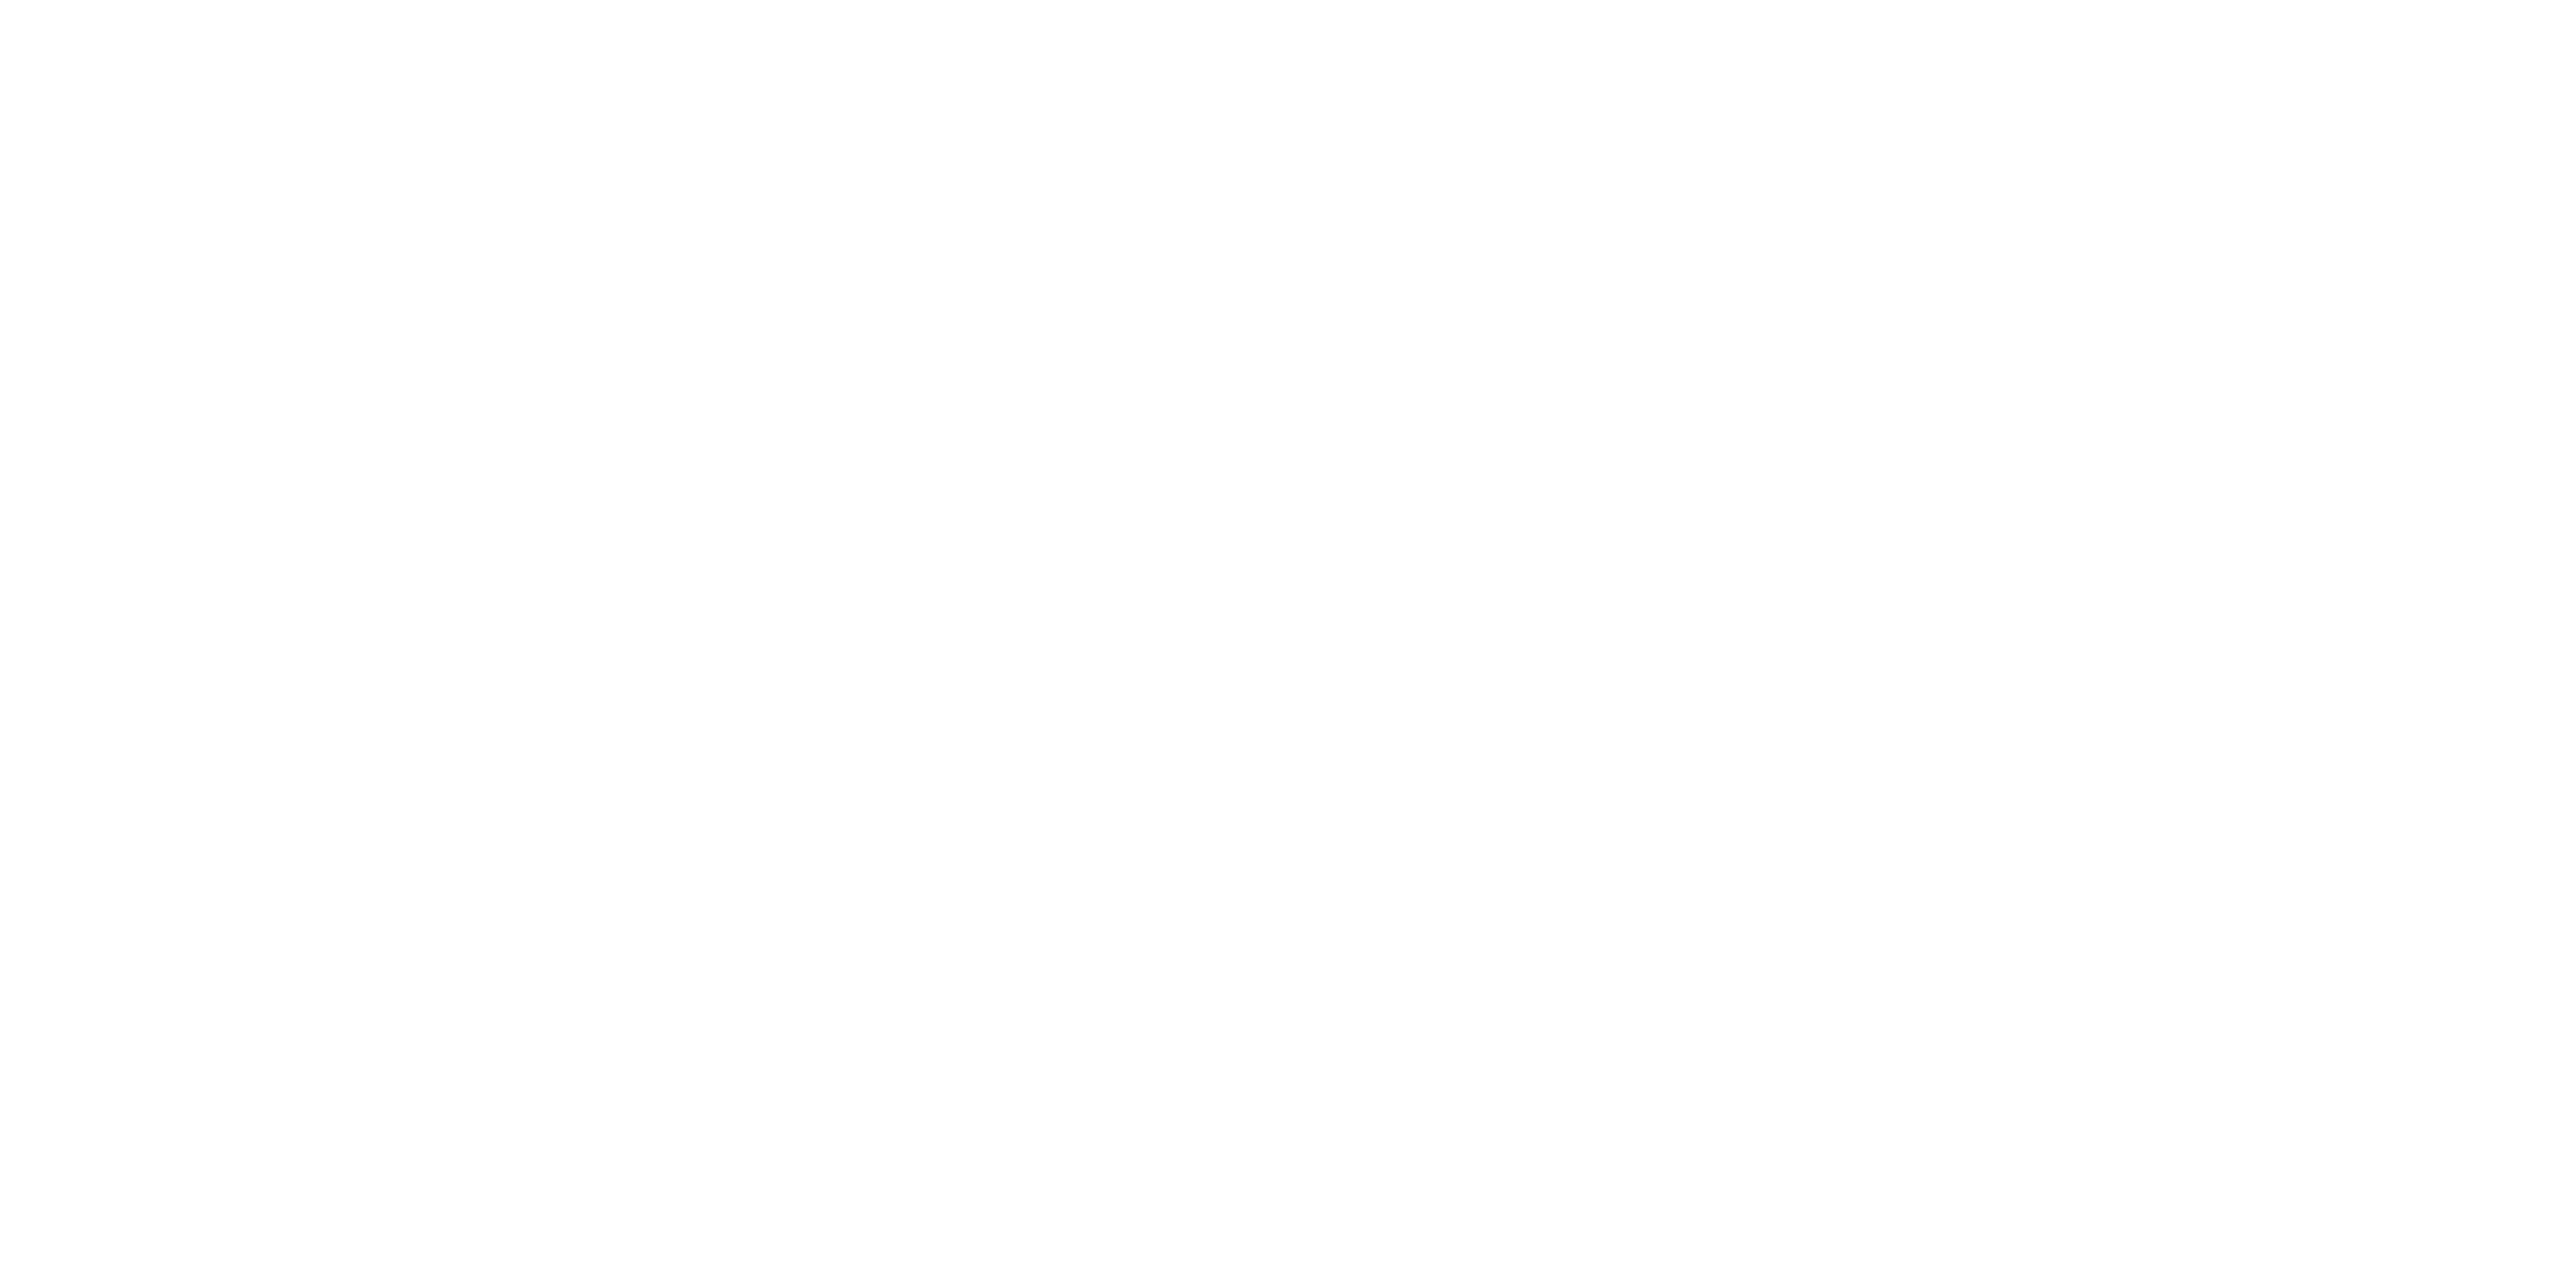

In [70]:
# try decision tree
# Create default Decision Tree classifer object
decisionTree_model_gini = DecisionTreeClassifier()

# Use entropy criterion
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use max depth of 3
decisionTree_model_depth = DecisionTreeClassifier(max_depth=5)

# Fit the trees
decisionTree_model_gini.fit(X_train,y_train)
decisionTree_model_entropy.fit(X_train,y_train)
decisionTree_model_depth.fit(X_train,y_train)

# Make prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth.predict(X_test)

print("Accuracy (gini):",metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (entropy):",metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (depth):",metrics.accuracy_score(y_test, y_pred_depth3))

# plot a decision tree
plt.figure(figsize=(40,20))
sk.tree.plot_tree(decisionTree_model_depth, filled=True, fontsize=14, feature_names=data.columns[1:128], class_names=['non-diabetic', 'diabetic'])
# label the tree

In [ ]:
from sklearn import datasets
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = ['Age', 'Sex', 'BMI', 'ABP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
df['target'] = diabetes.target

est = sm.OLS(endog=df['target'], exog=sm.add_constant(df[df.columns[0:4]])).fit()
est2 = sm.OLS(endog=df['target'], exog=sm.add_constant(df[df.columns[0:6]])).fit()

stargazer = Stargazer([est, est2])

HTML(stargazer.render_html())